# Making CMIP6 multimodel means

### Get the CMIP6 catalogue

In [2]:
from intake import open_catalog

cat = open_catalog(
    "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml"
)["climate"]["cmip6_gcs"]
#list(cat)

### Pick out the historical temperature of the surface

In [3]:
from cmip6_preprocessing.preprocessing import (
    rename_cmip6, 
    promote_empty_dims, 
    broadcast_lonlat, 
    replace_x_y_nominal_lat_lon
)
import dask

query = dict(
    variable_id=["ts"],
    experiment_id=["historical"],#, "ssp585"],
    table_id=["Amon"],
    institution_id=["NCAR", "NOAA-GFDL", "MOHC", "NASA-GISS", "UA", "INM", "THU", "SNU", "E3SM-Project"],
)
ts = cat.search(**query)

z_kwargs = {"consolidated": True, "decode_times": True}

def wrapper(ds):
    ds = ds.copy()
    ds = rename_cmip6(ds)
    ds = promote_empty_dims(ds)
    ds = broadcast_lonlat(ds)
    ds = replace_x_y_nominal_lat_lon(ds)
    return ds

# pass the preprocessing directly
with dask.config.set(**{"array.slicing.split_large_chunks": True}):
    dset_dict_proc = ts.to_dataset_dict(zarr_kwargs=z_kwargs,
                                        preprocess=wrapper)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [4]:
for key in dset_dict_proc:
    print(key)

CMIP.INM.INM-CM4-8.historical.Amon.gr1
CMIP.SNU.SAM0-UNICON.historical.Amon.gn
CMIP.MOHC.HadGEM3-GC31-MM.historical.Amon.gn
CMIP.NCAR.CESM2-WACCM-FV2.historical.Amon.gn
CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1
CMIP.INM.INM-CM5-0.historical.Amon.gr1
CMIP.NCAR.CESM2.historical.Amon.gn
CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.Amon.gn
CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1
CMIP.UA.MCM-UA-1-0.historical.Amon.gn
CMIP.E3SM-Project.E3SM-1-1.historical.Amon.gr
CMIP.E3SM-Project.E3SM-1-0.historical.Amon.gr
CMIP.THU.CIESM.historical.Amon.gr
CMIP.E3SM-Project.E3SM-1-1-ECA.historical.Amon.gr
CMIP.MOHC.HadGEM3-GC31-LL.historical.Amon.gn
CMIP.MOHC.UKESM1-0-LL.historical.Amon.gn
CMIP.NCAR.CESM2-WACCM.historical.Amon.gn
CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn
CMIP.NCAR.CESM2-FV2.historical.Amon.gn
CMIP.NASA-GISS.GISS-E2-1-G.historical.Amon.gn


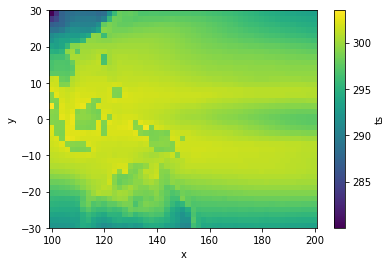

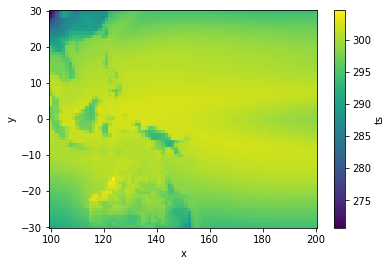

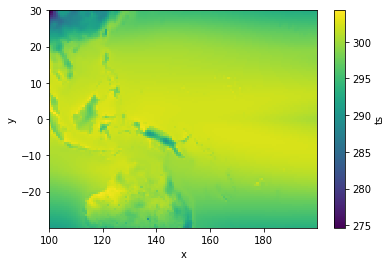

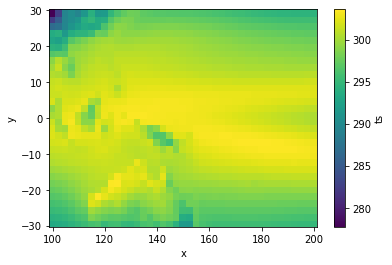

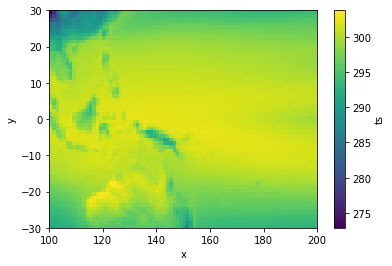

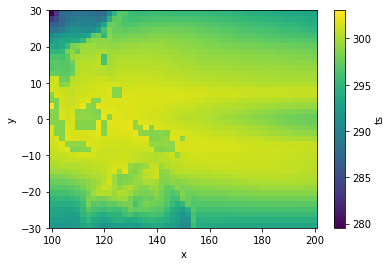

In [ ]:
import matplotlib.pyplot as plt
for key in dset_dict_proc:
    dset_dict_proc[key].ts.mean("member_id").sel(x=slice(100, 200), y=slice(-30, 30),time=slice("1954", "2014")).mean("time").plot()
    plt.show()

In [12]:
dset_dict_proc["CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Amon.gr"].ts.mean("member_id").sel(time=slice(""))

,Array,Chunk
Bytes,16.61 GB,8.19 MB
Shape,"(8, 1980, 512, 512)","(1, 125, 32, 512)"
Count,20490 Tasks,3968 Chunks
Type,float32,numpy.ndarray
